# Aprendizado de Máquina
## Lista 1
**Isabel Cristina de Oliveira Lopes, 493948**

#Importações


In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import math

#Funções úteis

In [ ]:
alpha = 0.001
w_0 = 0.001
w_1 = 0.001

def func_reta(w, x):
  func = 0
  for i in range(len(w)):
    func += w[i]*x**i
  return func

def plot_custo(epocas, custos, label):
  fig, ax = plt.subplots(figsize=(7, 5))
  ax.plot(np.arange(epocas), custos, 'r')
  ax.set_xlabel(label)
  ax.set_ylabel('Custo')

def plot_custos(epocas, custos, label):
  color = ['r', 'b', 'g']
  fig, ax = plt.subplots(figsize=(7, 5))
  for i in range(len(custos)):
    ax.plot(np.arange(epocas), custos[i], color[i])
  ax.legend(["treino", "teste"], loc=0, frameon=True)
  ax.set_xlabel(label)
  ax.set_ylabel('Custo')

def plot_reg(x, y, w):
  y_values_line = [func_reta(w, x) for x in x ]
 
  plt.figure(figsize=(7, 5))
  plt.plot(x, y_values_line, 'r')
  plt.plot(x, y, 'bo')
  plt.show()

In [ ]:
#Erro Quadratico Medio (MSE, Mean Squared Error).
def MSE(x, y, w_0, w_1):
  return np.mean(((y - (w_0 + w_1*x))**2))

In [ ]:
def normalizacao(x, y):
  x_max = np.max(x, axis = 0)
  x_min = np.min(x, axis = 0)

  y_max = np.max(y, axis = 0)
  y_min = np.min(y, axis = 0)

  x = ((x - x_min)/(x_max - x_min))
  y = ((y - y_min)/(y_max - y_min))

  return {"atr": x, "max": x_max, "min": x_min}, {"atr": y, "max": y_max, "min": y_min}

def desnormalizacao(data, max, min):
  return data*(max - min) + min


# Questão 1

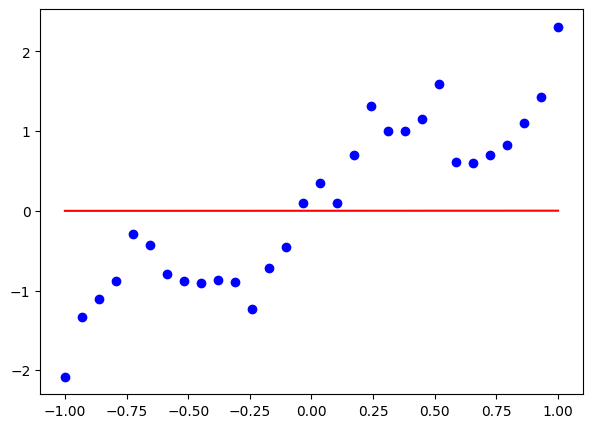

1.100466420241539

In [ ]:
data = np.genfromtxt('/content/artificial1d.csv', delimiter=',')
data

x = data[:,0]
y = data[:,1]

plot_reg(x, y, [w_0, w_1])
MSE(x, y, w_0, w_1)


## Item A
###OLS (Mínimos Quadrados Ordinários).

In [ ]:
def inv_mult(b, v1):
  return np.linalg.solve(b, v1)

def rmse(y_real, y_pred, n):
  return np.sqrt(((y_real - y_pred) ** 2).sum() / n)

def OLS(X, y):
  
  w = inv_mult((X.T @ X), X.T) @ y
  y_predito = X @ w

  return y_predito, w

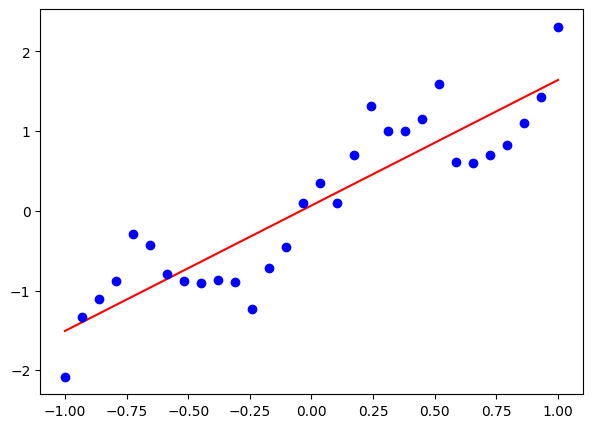

Erro Quadratico Medio: 0.21340090132936987


In [ ]:
x_matriz = np.hstack((np.ones((x.shape[0], 1)), data[:,[0]]))
y_p, w = OLS(x_matriz, y)

plot_reg(x, y, w)

print("Erro Quadratico Medio:", MSE(x, y, w[0], w[1]))

## Item B
###GD (gradiente descendente).

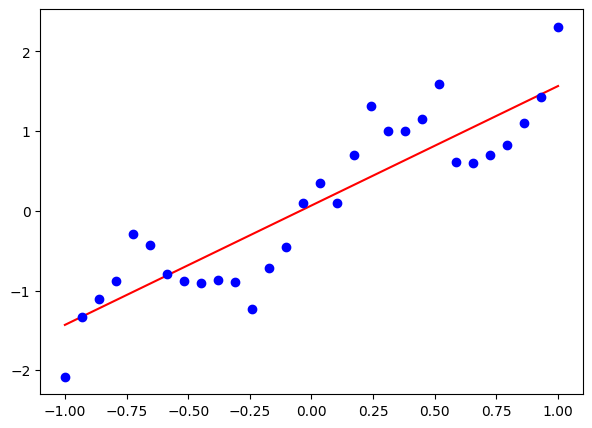

Erro Quadratico Medio: 0.21546429635641853


In [ ]:
#Algoritimo Gradiente Descendente

def gd_step(x, y, w_0, w_1):
  err_w_0 = np.mean(y - (w_0 + w_1*x))
  err_w_1 = np.mean((y - (w_0 + w_1*x)) * x)

  return w_0 + (alpha  * err_w_0), w_1 +  (alpha  * err_w_1)

def gd(epocas, X, y, w_0, w_1):
  custos  = []
  for i in range(epocas):
    w_0, w_1 = gd_step(X, y, w_0, w_1)
    custos.append(MSE(X, y, w_0, w_1))
    
  return w_0, w_1, custos

epocas = 8500

w_0, w_1, custos = gd(epocas, x, y, w_0, w_1)
plot_reg(x, y, [w_0, w_1])
print("Erro Quadratico Medio:", MSE(x, y, w_0, w_1))

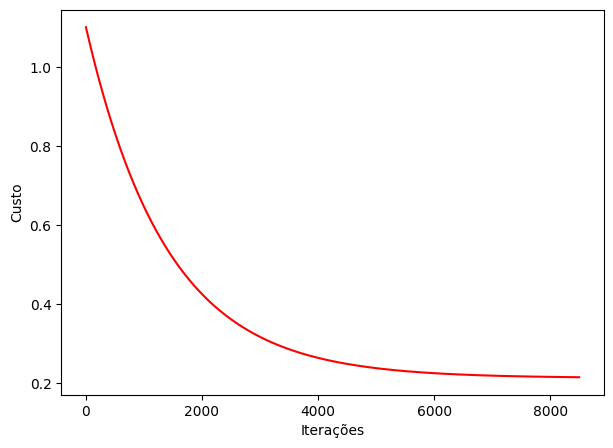

In [ ]:
plot_custo(epocas, custos, "Iterações")

## Item C
###SGD (Gradiente Descendente Estocástico).

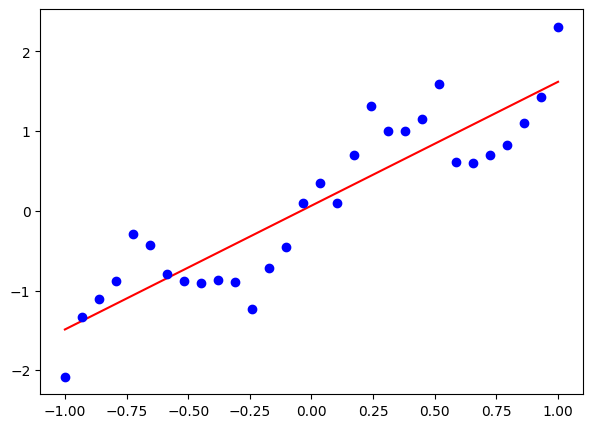

Erro Quadratico Medio: 0.213560285898414


In [ ]:
w_0 = 0.001
w_1 = 0.001
alpha = 0.01

def sgd_step(x, y, w_0, w_1, i):
  erro_w_0 = y[i] - func_reta([w_0, w_1], x[i])
  erro_w_1 = (y[i] - func_reta([w_0, w_1], x[i]) )* x[i]

  w_0 = w_0 + (alpha  * erro_w_0)
  w_1 = w_1 +  (alpha  * erro_w_1)
  return w_0, w_1

def sgd(epocas, x, y, w_0, w_1):
  custos = []
  matriz_x_y = np.column_stack((x, y))
  for i in range(epocas): 
    matriz_permutada = np.random.permutation(matriz_x_y)
    
    for i in range(matriz_permutada.shape[0]): 
      w_0, w_1 = sgd_step(matriz_permutada[:,0], matriz_permutada[:,1], w_0, w_1, i)
      custos.append(MSE(x, y, w_0, w_1)) 
    
  return w_0, w_1, custos

epocas = 40
w_0, w_1, custos = sgd(epocas, x, y, w_0, w_1)
plot_reg(x, y, [w_0, w_1])
print("Erro Quadratico Medio:", MSE(x, y, w_0, w_1))


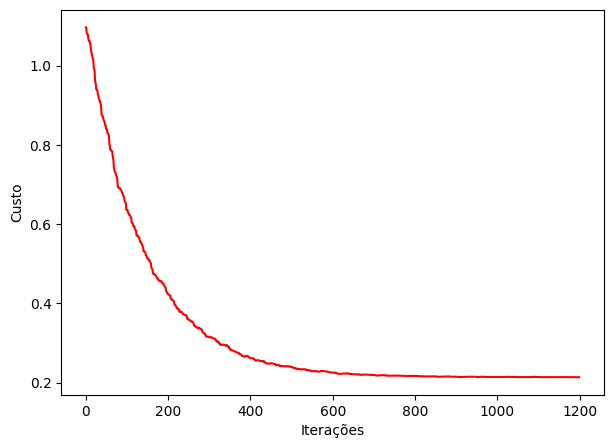

In [ ]:
plot_custo(epocas * len(x), custos, "Iterações")

#Questão 2

In [ ]:
c_data = np.genfromtxt('/content/california.csv', delimiter=',')
c_data

array([[   4.1685    ,   20.        ,    6.70063694, ...,   38.8       ,
        -121.15      ,    2.175     ],
       [   2.8194    ,   24.        ,    4.7625    , ...,   36.75      ,
        -119.85      ,    0.811     ],
       [   2.425     ,   46.        ,    4.92771084, ...,   36.33      ,
        -119.31      ,    0.849     ],
       ...,
       [   4.7308    ,   35.        ,    5.66666667, ...,   33.83      ,
        -118.37      ,    3.534     ],
       [   4.2788    ,   10.        ,    5.375     , ...,   33.68      ,
        -117.35      ,    1.25      ],
       [   2.8036    ,   18.        ,    3.27400881, ...,   34.1       ,
        -118.35      ,    2.25      ]])

In [ ]:
def OLS_L2(X, y, lamb):
  w = inv_mult(((X.T @ X) + lamb * np.identity(X.shape[1])), X.T) @ y
  y_predito = X @ w

  return y_predito, w

##Item A


In [ ]:
rand_data = np.random.permutation(c_data)
test_data = rand_data[:int(c_data.shape[0] * 0.2)]
training_data = rand_data[int(c_data.shape[0] * 0.2):]

##Item B

In [ ]:
def regressao_polinomial(x, grau):
  x_polynomial = np.ones((x.shape[0], 1))
  for i in range(x.shape[1]):
    d_x = x[:, i]
    d_x = np.reshape(d_x, (d_x.shape[0], 1))

    for j in range(1, grau + 1):
      x_polynomial = np.concatenate((x_polynomial, d_x ** j), axis=1)
  return x_polynomial

##Item C

In [ ]:
def training_model(data, grau):
  x, y = normalizacao(data[:, :-1], data[:, -1])
  custos = np.array([])
  for i in range(1, grau + 1):
    x_polynomial = regressao_polinomial(x["atr"], i)
    y_p, w = OLS(x_polynomial, y["atr"])

    y_not_n = desnormalizacao(y["atr"], y["max"], y["min"])
    y_p_not_n = desnormalizacao(y_p, y["max"], y["min"])

    err = rmse(y_not_n, y_p_not_n, x["atr"].shape[0])
    print("GRAU", i, "-", "RMSE (Raiz Quadrada do Erro Quadrático Médio): ", err)
    custos = np.append(custos, err)
  return custos

grau = 13
print("Dados de Treino:")
c_training = training_model(training_data, grau)
print("Dados de Teste:")
c_test = training_model(test_data, grau)

Dados de Treino:
GRAU 1 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6796394073143333
GRAU 2 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6544420691201315
GRAU 3 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.63113969030563
GRAU 4 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6264461614613657
GRAU 5 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6178741001115181
GRAU 6 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6108322039110564
GRAU 7 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6065121915349424
GRAU 8 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.60268692347511
GRAU 9 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6022184499337024
GRAU 10 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.5924062463304329
GRAU 11 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.5881777109476702
GRAU 12 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  1.831572274487523
GRAU 13 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  1.2739541162689

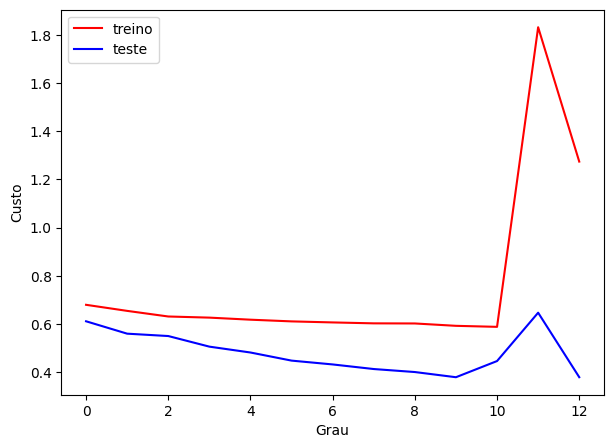

In [ ]:
plot_custos(grau, [c_training, c_test], "Grau")

##Item D

In [ ]:
def training_model(data, grau):
  x, y = normalizacao(data[:, :-1], data[:, -1])
  custos = np.array([])
  for i in range(1, grau + 1):
    x_polynomial = regressao_polinomial(x["atr"], i)
    y_p, w = OLS_L2(x_polynomial, y["atr"], 0.01)

    y_not_n = desnormalizacao(y["atr"], y["max"], y["min"])
    y_p_not_n = desnormalizacao(y_p, y["max"], y["min"])


    err = rmse(y_not_n, y_p_not_n, x["atr"].shape[0])
    print("GRAU", i, "-", "RMSE (Raiz Quadrada do Erro Quadrático Médio): ", err)
    custos = np.append(custos, err)
  return custos

grau = 13
print("Dados de Treino:")
c_training = training_model(training_data, grau)
print("Dados de Teste:")
c_test = training_model(test_data, grau)

Dados de Treino:
GRAU 1 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6796432039402713
GRAU 2 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6546024011891887
GRAU 3 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6390860375477388
GRAU 4 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6358662834506887
GRAU 5 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6347228919209907
GRAU 6 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6341512092616951
GRAU 7 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6335399094612525
GRAU 8 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6327151524655842
GRAU 9 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6317378041250301
GRAU 10 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6307837075715984
GRAU 11 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6299865893802251
GRAU 12 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.6293843293572423
GRAU 13 - RMSE (Raiz Quadrada do Erro Quadrático Médio):  0.62895448

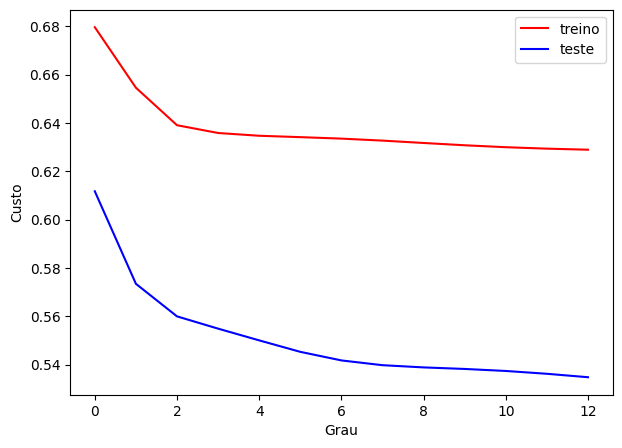

In [ ]:
plot_custos(grau, [c_training, c_test], "Grau")